In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import mediapipe as mp 
import cv2 as cv
import os 
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight

In [2]:
from pathlib import Path


files, masks, labels = [], [], []

DATA_DIR = Path(r"Preprocessed_No_Sliding_Window_OR_Mask\Preprocessed_No_Sliding_Window_OR_Mask")
for f in DATA_DIR.glob("*.npy"):


    mask_f = f.with_name(f.stem + ".npy")
    if not mask_f.exists():
        continue

    arr = np.load(f)

    files.append(str(f))
    masks.append(str(mask_f))
    labels.append(f.stem.split("_")[0])

# Filter rare classes
cnt = Counter(labels)
keep = [i for i, y in enumerate(labels) if cnt[y] >= 2]

files = [files[i] for i in keep]
masks = [masks[i] for i in keep]
labels = [labels[i] for i in keep]

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)


In [3]:
len(np.unique(labels))

146

### After preprocessing 

In [6]:
X_tr, X_tmp, y_tr, y_tmp, m_tr, m_tmp = train_test_split(
    files, y, masks, test_size=0.2, stratify=y, random_state=42
)
X_val, X_te, y_val, y_te, m_val, m_te = train_test_split(
    X_tmp, y_tmp, m_tmp, test_size=0.5, stratify=y_tmp, random_state=42
)

In [7]:
X_tr_data = [np.load(Path(f)) for f in X_tr]

print(len(X_tr_data))



4454


In [8]:
X_te_data = [np.load(Path(f)) for f in X_te]

print(len(X_te_data))
print(X_te_data[0].shape)


557
(157, 438)


In [9]:
X_val_data = [np.load(Path(f)) for f in X_val]

print(len(X_val_data))
print(X_val_data[0].shape)

557
(157, 438)


In [8]:
y_tr.shape

(4454,)

In [10]:
X_val_data=np.array(X_val_data)
X_te_data=np.array(X_te_data)
X_tr_data=np.array(X_tr_data)

In [10]:
X_tr_data.shape

(4454, 157, 438)


📊 Data Verification:
X_tr_data shape: (4454, 157, 438)
y_tr shape: (4454,)
X_val_data shape: (557, 157, 438)
X_test_data shape: (557, 157, 438)
🚀 TRAINING SIGN LANGUAGE TRANSFORMER
Training samples: 4454
Validation samples: 557
Test samples: 557
Input shape: (157, 438)

📋 Model Architecture:


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 157, 438)  │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_projection    │ (None, 157, 256)  │    112,384 │ input_layer_4[0]… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 157, 256)  │          0 │ input_projection… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 157, 256)  │        512 │ add_7[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 157, 256)  │    263,168 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 157, 256)  │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 157, 256)  │          0 │ add_7[0][0],      │
│                     │                   │            │ dropout_29[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 157, 256)  │        512 │ add_8[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_9        │ (None, 157, 256)  │    262,912 │ layer_normalizat… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 157, 256)  │          0 │ sequential_9[0][… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_9 (Add)         │ (None, 157, 256)  │          0 │ add_8[0][0],      │
│                     │                   │            │ dropout_31[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 157, 256)  │        512 │ add_9[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 157, 256)  │    263,168 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_33          │ (None, 157, 256)  │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_10 (Add)        │ (None, 157, 256)  │          0 │ add_9[0][0],      │
│                     │                   │            │ dropout_33[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 157, 256)  │        512 │ add_10[0][0]      │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_10       │ (None, 157, 256)  │    262,912 │ layer_normalizat… │
│ (Sequential)        │                   │            │                 

 Total params: 1,812,754 (6.92 MB)

 Trainable params: 1,811,986 (6.91 MB)

 Non-trainable params: 768 (3.00 KB)


Total parameters: 1,812,754

🎯 Starting training...

Epoch 1/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step - accuracy: 0.0123 - loss: 5.2809
Epoch 1: val_accuracy improved from -inf to 0.01077, saving model to best_model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 66s 406ms/step - accuracy: 0.0124 - loss: 5.2792 - val_accuracy: 0.0108 - val_loss: 11.5590 - learning_rate: 0.0010
Epoch 2/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 0.0606 - loss: 4.3568
Epoch 2: val_accuracy improved from 0.01077 to 0.02513, saving model to best_model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 57s 404ms/step - accuracy: 0.0607 - loss: 4.3559 - val_accuracy: 0.0251 - val_loss: 7.4336 - learning_rate: 0.0010
Epoch 3/150
140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step - accuracy: 0.0944 - loss: 3.8800
Epoch 3: val_accuracy improved from 0.02513 to 0.05745, saving model to best_model.keras
140/140 ━━━━━━━━━━━━━━━━━━━━ 58s 412ms/step - accuracy: 0.0944 - loss: 3.8795 - val_accuracy: 0.0575 - val_loss: 5.5760 - lear

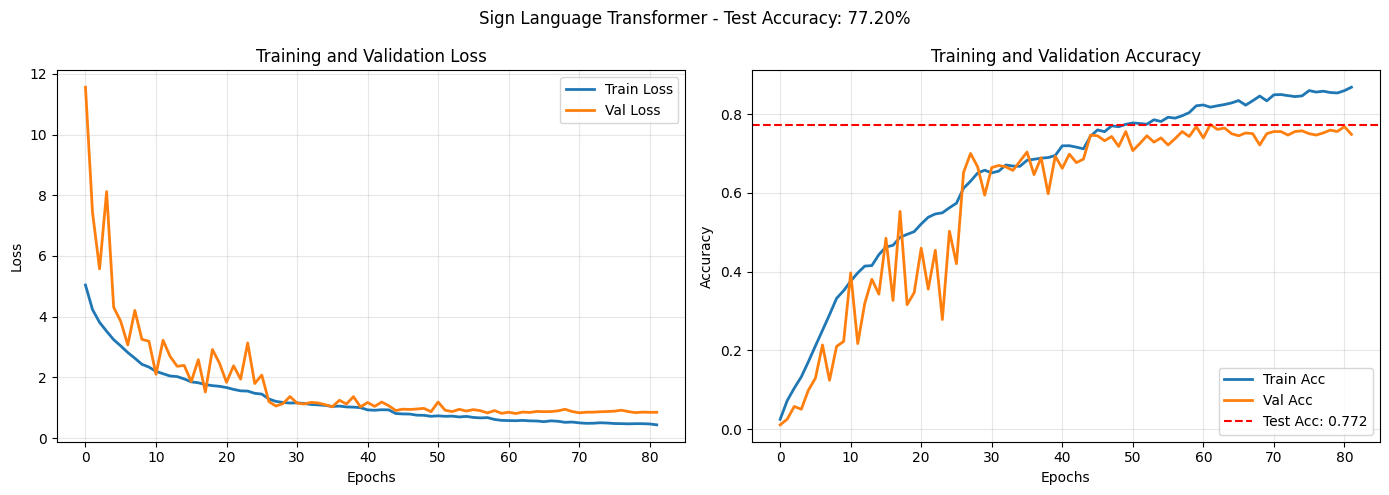

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION - Using your exact data shape
# ============================================================================

class Config:
    # Your exact data shape
    NUM_FRAMES = 157
    FEATURE_DIM = 438  # Your preprocessed feature dimension
    NUM_CLASSES = 146  # Your number of sign classes
    
    # Model parameters
    D_MODEL = 256  # Reduced for faster training with your data size
    NUM_HEADS = 4
    NUM_ENCODER_LAYERS = 3  # Reduced depth
    FF_DIM = 512
    DROPOUT_RATE = 0.4  # Strong regularization
    
    # Training parameters
    BATCH_SIZE = 32
    EPOCHS = 150
    LEARNING_RATE = 1e-3
    WEIGHT_DECAY = 1e-4

config = Config()

# ============================================================================
# TRANSFORMER MODEL - Fixed Version
# ============================================================================

def create_positional_encoding(length, d_model):
    """Create sinusoidal positional encoding"""
    positions = np.arange(length)[:, np.newaxis]
    depths = np.arange(d_model)[np.newaxis, :] / d_model
    
    angle_rates = 1 / np.power(10000, 2 * depths)
    angle_rads = positions * angle_rates
    
    pos_encoding = np.zeros((length, d_model))
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    return tf.constant(pos_encoding, dtype=tf.float32)

def build_transformer_model(config):
    """
    Build the transformer model for sign language recognition
    """
    
    # Input layer
    inputs = keras.Input(shape=(config.NUM_FRAMES, config.FEATURE_DIM))
    
    # Project to model dimension
    x = layers.Dense(config.D_MODEL, name='input_projection')(inputs)
    
    # Add positional encoding
    pos_encoding = create_positional_encoding(config.NUM_FRAMES, config.D_MODEL)
    x = x + pos_encoding[tf.newaxis, :, :]
    
    # Transformer encoder blocks
    for i in range(config.NUM_ENCODER_LAYERS):
        # Multi-head attention with pre-norm
        attn_input = layers.LayerNormalization(epsilon=1e-6)(x)
        attn_output = layers.MultiHeadAttention(
            num_heads=config.NUM_HEADS,
            key_dim=config.D_MODEL // config.NUM_HEADS,
            dropout=config.DROPOUT_RATE
        )(attn_input, attn_input)
        x = layers.Add()([x, layers.Dropout(config.DROPOUT_RATE)(attn_output)])
        
        # Feed-forward network with pre-norm
        ffn_input = layers.LayerNormalization(epsilon=1e-6)(x)
        ffn_output = keras.Sequential([
            layers.Dense(config.FF_DIM, activation='gelu'),
            layers.Dropout(config.DROPOUT_RATE),
            layers.Dense(config.D_MODEL)
        ])(ffn_input)
        x = layers.Add()([x, layers.Dropout(config.DROPOUT_RATE)(ffn_output)])
    
    # Global pooling
    x = layers.GlobalAveragePooling1D()(x)
    
    # Classification head with stronger regularization
    x = layers.Dense(256, activation='gelu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(config.DROPOUT_RATE)(x)
    
    x = layers.Dense(128, activation='gelu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(config.DROPOUT_RATE * 0.75)(x)
    
    outputs = layers.Dense(config.NUM_CLASSES, activation='softmax')(x)
    
    # Create model
    model = keras.Model(inputs, outputs)
    
    return model

# ============================================================================
# TRAINING FUNCTION - FIXED
# ============================================================================

def train_model(X_train, y_train, X_val, y_val, X_test, y_test):
    """
    Train the transformer model on your preprocessed data
    """
    
    print("="*60)
    print("🚀 TRAINING SIGN LANGUAGE TRANSFORMER")
    print("="*60)
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Test samples: {len(X_test)}")
    print(f"Input shape: {X_train.shape[1:]}")
    print("="*60)
    
    # Build model
    model = build_transformer_model(config)
    
    # Print model summary
    print("\n📋 Model Architecture:")
    model.summary()
    print(f"\nTotal parameters: {model.count_params():,}")
    print("="*60)
    
    # Compile - FIXED: removed label_smoothing
    model.compile(
        optimizer=keras.optimizers.AdamW(
            learning_rate=config.LEARNING_RATE,
            weight_decay=config.WEIGHT_DECAY
        ),
        loss=keras.losses.SparseCategoricalCrossentropy(),  # No label_smoothing
        metrics=['accuracy']
    )
    
    # Callbacks
    callbacks = [
        keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=20,
            restore_best_weights=True,
            mode='max',
            verbose=1
        ),
        keras.callbacks.ReduceLROnPlateau(
            monitor='val_accuracy',
            factor=0.5,
            patience=8,
            min_lr=1e-6,
            mode='max',
            verbose=1
        ),
        keras.callbacks.ModelCheckpoint(
            'best_model.keras',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max',
            verbose=1
        ),
        keras.callbacks.CSVLogger('training_log.csv')
    ]
    
    # Train
    print("\n🎯 Starting training...\n")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=config.EPOCHS,
        batch_size=config.BATCH_SIZE,
        callbacks=callbacks,
        verbose=1
    )
    
    # Load best model
    model.load_weights('best_model.keras')
    
    # Evaluate on test set
    print("\n📊 Evaluating on test set...")
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    print("\n" + "="*60)
    print(f"🎯 FINAL TEST ACCURACY: {test_acc:.4f} ({test_acc*100:.2f}%)")
    print("="*60)
    
    return model, history, test_acc

# ============================================================================
# VISUALIZATION FUNCTION
# ============================================================================

def plot_results(history, test_acc):
    """Plot training curves"""
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Loss
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[1].plot(history.history['accuracy'], label='Train Acc', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='Val Acc', linewidth=2)
    axes[1].axhline(y=test_acc, color='r', linestyle='--', 
                    label=f'Test Acc: {test_acc:.3f}')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.suptitle(f'Sign Language Transformer - Test Accuracy: {test_acc:.2%}')
    plt.tight_layout()
    plt.savefig('training_results.png', dpi=150, bbox_inches='tight')
    plt.show()

# ============================================================================
# PREDICTION FUNCTION
# ============================================================================

def predict_sign(model, sample, class_names=None):
    """Predict sign for a single sample"""
    if len(sample.shape) == 2:
        sample = sample[np.newaxis, ...]
    
    probs = model.predict(sample, verbose=0)[0]
    pred_class = np.argmax(probs)
    confidence = probs[pred_class]
    
    if class_names:
        print(f"Predicted: {class_names[pred_class]} (confidence: {confidence:.3f})")
    else:
        print(f"Predicted class: {pred_class} (confidence: {confidence:.3f})")
    
    # Top-3 predictions
    top3 = np.argsort(probs)[-3:][::-1]
    print("\nTop-3 predictions:")
    for i, idx in enumerate(top3):
        if class_names:
            print(f"  {i+1}. {class_names[idx]} ({probs[idx]:.3f})")
        else:
            print(f"  {i+1}. Class {idx} ({probs[idx]:.3f})")
    
    return pred_class, confidence

# ============================================================================
# MAIN EXECUTION - FIXED variable names
# ============================================================================

print("\n📊 Data Verification:")
print(f"X_tr_data shape: {X_tr_data.shape}")
print(f"y_tr shape: {y_tr.shape}")
print(f"X_val_data shape: {X_val_data.shape}")
print(f"X_test_data shape: {X_te_data.shape}")  # Fixed: was X_te_data

# Train the model - FIXED: using correct variable names
model, history, test_acc = train_model(
    X_tr_data, y_tr,
    X_val_data, y_val,
    X_te_data, y_te  # Fixed: was X_te_data, y_te
)

# Plot results
plot_results(history, test_acc)

# Save final model
model.save('final_model.keras')
model.save_weights('final_model.weights.h5')





📊 Data Verification:
X_tr_data shape: (4454, 157, 438)
y_tr shape: (4454,)
X_val_data shape: (557, 157, 438)
X_te_data shape: (557, 157, 438)
🤟 SIGNBART TRAINING
Training samples: 4454
Validation samples: 557
Test samples: 557
Input shape: (157, 438)

📊 Model parameters: 855,954

🎯 Starting training with warmup and gradient clipping...

Epoch 1/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step - accuracy: 0.0058 - loss: 6.3588
Epoch 1: val_accuracy improved from -inf to 0.01077, saving model to best_signbart.keras
70/70 ━━━━━━━━━━━━━━━━━━━━ 47s 397ms/step - accuracy: 0.0058 - loss: 6.3587 - val_accuracy: 0.0108 - val_loss: 5.2567
Epoch 2/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step - accuracy: 0.0067 - loss: 6.3235
Epoch 2: val_accuracy did not improve from 0.01077
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 327ms/step - accuracy: 0.0067 - loss: 6.3239 - val_accuracy: 0.0090 - val_loss: 5.2013
Epoch 3/200
70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.0059 - loss: 6.2763
Epoch 3: val_accuracy i

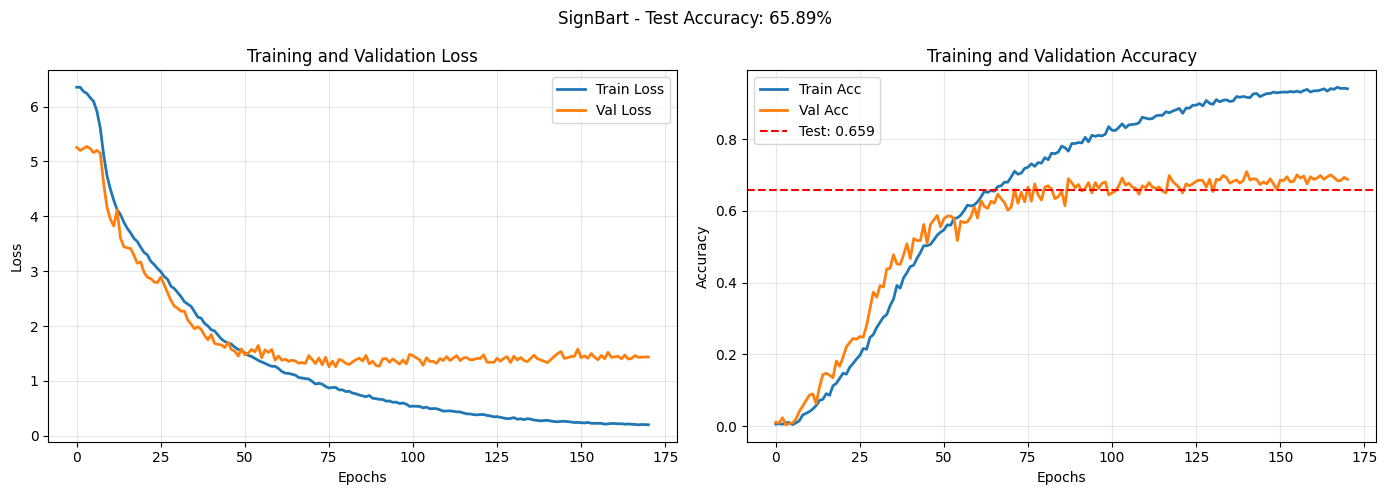


✅ Model saved to 'signbart_final.keras'

🔍 Testing on first 5 test samples:

Sample 1:
Predicted class: 41 (confidence: 0.983)
Top-3 predictions:
  1. Class 41 (0.983)
  2. Class 115 (0.006)
  3. Class 20 (0.003)

Sample 2:
Predicted class: 2 (confidence: 0.999)
Top-3 predictions:
  1. Class 2 (0.999)
  2. Class 85 (0.000)
  3. Class 137 (0.000)

Sample 3:
Predicted class: 18 (confidence: 0.943)
Top-3 predictions:
  1. Class 18 (0.943)
  2. Class 141 (0.026)
  3. Class 76 (0.012)

Sample 4:
Predicted class: 139 (confidence: 0.415)
Top-3 predictions:
  1. Class 139 (0.415)
  2. Class 105 (0.247)
  3. Class 91 (0.181)

Sample 5:
Predicted class: 136 (confidence: 0.878)
Top-3 predictions:
  1. Class 136 (0.878)
  2. Class 11 (0.058)
  3. Class 59 (0.019)

🎉 SignBart pipeline complete!


In [32]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION
# ============================================================================

class SignBartConfig:
    # Data parameters
    NUM_FRAMES = 157
    FEATURE_DIM = 438
    
    # Model architecture
    D_MODEL = 128
    NUM_ENCODER_LAYERS = 2
    NUM_DECODER_LAYERS = 2
    NUM_HEADS = 4
    FF_DIM = 256
    
    # Regularization
    DROPOUT_RATE = 0.3
    
    # Training
    NUM_CLASSES = 146
    BATCH_SIZE = 64
    EPOCHS = 200
    LEARNING_RATE = 5e-4
    LEARNING_RATE_MIN = 1e-6
    WARMUP_EPOCHS = 10
    WEIGHT_DECAY = 1e-5
    
config = SignBartConfig()

# ============================================================================
# FIXED LEARNING RATE SCHEDULE WITH GET_CONFIG
# ============================================================================

class WarmUpCosineDecay(tf.keras.optimizers.schedules.LearningRateSchedule):
    """Learning rate schedule with warmup and cosine decay"""
    
    def __init__(self, warmup_steps, total_steps, start_lr=1e-5, target_lr=1e-3, min_lr=1e-6):
        super().__init__()
        self.warmup_steps = warmup_steps
        self.total_steps = total_steps
        self.start_lr = start_lr
        self.target_lr = target_lr
        self.min_lr = min_lr
        
    def __call__(self, step):
        # Warmup phase
        warmup_ratio = tf.cast(step, tf.float32) / tf.cast(self.warmup_steps, tf.float32)
        warmup_ratio = tf.minimum(warmup_ratio, 1.0)
        warmup_lr = self.start_lr + warmup_ratio * (self.target_lr - self.start_lr)
        
        # Cosine decay phase
        progress = (tf.cast(step, tf.float32) - tf.cast(self.warmup_steps, tf.float32)) / \
                   tf.cast(self.total_steps - self.warmup_steps, tf.float32)
        progress = tf.clip_by_value(progress, 0.0, 1.0)
        cosine_decay = 0.5 * (1.0 + tf.cos(np.pi * progress))
        decay_lr = self.min_lr + (self.target_lr - self.min_lr) * cosine_decay
        
        return tf.where(step < self.warmup_steps, warmup_lr, decay_lr)
    
    def get_config(self):
        return {
            'warmup_steps': self.warmup_steps,
            'total_steps': self.total_steps,
            'start_lr': self.start_lr,
            'target_lr': self.target_lr,
            'min_lr': self.min_lr
        }

# ============================================================================
# COORDINATE PROJECTION
# ============================================================================

class CoordinateProjection(layers.Layer):
    """Projects x,y,z,visibility separately before fusion"""
    
    def __init__(self, d_model, name=None):
        super().__init__(name=name)
        self.d_model = d_model
        
        initializer = tf.keras.initializers.HeNormal()
        
        self.proj_x = layers.Dense(d_model, kernel_initializer=initializer, name=f"{name}_proj_x")
        self.proj_y = layers.Dense(d_model, kernel_initializer=initializer, name=f"{name}_proj_y")
        self.proj_z = layers.Dense(d_model, kernel_initializer=initializer, name=f"{name}_proj_z")
        self.proj_v = layers.Dense(d_model, kernel_initializer=initializer, name=f"{name}_proj_v")
        
        self.fusion = layers.Dense(d_model, kernel_initializer=initializer, name=f"{name}_fusion")
        self.norm = layers.LayerNormalization(epsilon=1e-6)
        self.dropout = layers.Dropout(0.1)
        
    def call(self, inputs, training=False):
        # Split MediaPipe format
        pose = inputs[:, :, :132]
        face = inputs[:, :, 132:312]
        hands = inputs[:, :, 312:]
        
        # Process pose
        pose_x = pose[:, :, 0::4]
        pose_y = pose[:, :, 1::4]
        pose_z = pose[:, :, 2::4]
        pose_v = pose[:, :, 3::4]
        
        # Process face
        face_x = face[:, :, 0::3]
        face_y = face[:, :, 1::3]
        face_z = face[:, :, 2::3]
        face_v = tf.ones_like(face_x) * 0.5
        
        # Process hands
        hands_x = hands[:, :, 0::3]
        hands_y = hands[:, :, 1::3]
        hands_z = hands[:, :, 2::3]
        hands_v = tf.ones_like(hands_x) * 0.5
        
        # Concatenate
        all_x = tf.concat([pose_x, face_x, hands_x], axis=-1)
        all_y = tf.concat([pose_y, face_y, hands_y], axis=-1)
        all_z = tf.concat([pose_z, face_z, hands_z], axis=-1)
        all_v = tf.concat([pose_v, face_v, hands_v], axis=-1)
        
        # Project
        proj_x = self.proj_x(all_x)
        proj_y = self.proj_y(all_y)
        proj_z = self.proj_z(all_z)
        proj_v = self.proj_v(all_v)
        
        # Fuse
        fused = proj_x + proj_y + proj_z + proj_v
        fused = self.dropout(fused, training=training)
        fused = self.fusion(fused)
        fused = self.norm(fused)
        
        return fused

# ============================================================================
# TRANSFORMER LAYERS
# ============================================================================

class BartEncoderLayer(layers.Layer):
    """Transformer encoder layer"""
    
    def __init__(self, d_model, num_heads, ff_dim, dropout_rate, name=None):
        super().__init__(name=name)
        
        initializer = tf.keras.initializers.HeNormal()
        
        self.self_attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=d_model // num_heads,
            dropout=dropout_rate,
            kernel_initializer=initializer
        )
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation='gelu', kernel_initializer=initializer),
            layers.Dropout(dropout_rate),
            layers.Dense(d_model, kernel_initializer=initializer)
        ])
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout = layers.Dropout(dropout_rate)
        
    def call(self, x, training=False):
        # Self-attention
        residual = x
        x = self.norm1(x)
        x = self.self_attn(x, x, training=training)
        x = self.dropout(x, training=training)
        x = residual + x
        
        # FFN
        residual = x
        x = self.norm2(x)
        x = self.ffn(x, training=training)
        x = self.dropout(x, training=training)
        x = residual + x
        
        return x

class BartDecoderLayer(layers.Layer):
    """Transformer decoder layer with cross-attention"""
    
    def __init__(self, d_model, num_heads, ff_dim, dropout_rate, name=None):
        super().__init__(name=name)
        
        initializer = tf.keras.initializers.HeNormal()
        
        self.self_attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=d_model // num_heads,
            dropout=dropout_rate,
            kernel_initializer=initializer
        )
        self.norm1 = layers.LayerNormalization(epsilon=1e-6)
        
        self.cross_attn = layers.MultiHeadAttention(
            num_heads=num_heads,
            key_dim=d_model // num_heads,
            dropout=dropout_rate,
            kernel_initializer=initializer
        )
        self.norm2 = layers.LayerNormalization(epsilon=1e-6)
        
        self.ffn = keras.Sequential([
            layers.Dense(ff_dim, activation='gelu', kernel_initializer=initializer),
            layers.Dropout(dropout_rate),
            layers.Dense(d_model, kernel_initializer=initializer)
        ])
        self.norm3 = layers.LayerNormalization(epsilon=1e-6)
        
        self.dropout = layers.Dropout(dropout_rate)
        
    def call(self, x, encoder_output, training=False):
        # Self-attention
        residual = x
        x = self.norm1(x)
        x = self.self_attn(x, x, training=training)
        x = self.dropout(x, training=training)
        x = residual + x
        
        # Cross-attention
        residual = x
        x = self.norm2(x)
        x = self.cross_attn(x, encoder_output, encoder_output, training=training)
        x = self.dropout(x, training=training)
        x = residual + x
        
        # FFN
        residual = x
        x = self.norm3(x)
        x = self.ffn(x, training=training)
        x = self.dropout(x, training=training)
        x = residual + x
        
        return x

# ============================================================================
# SIGNBART MODEL
# ============================================================================

class SignBart(Model):
    """SignBart model for sign language recognition"""
    
    def __init__(self, config):
        super().__init__()
        self.config = config
        
        initializer = tf.keras.initializers.HeNormal()
        
        # Coordinate projection
        self.coord_proj = CoordinateProjection(config.D_MODEL, name='coord_projection')
        
        # Positional encoding
        self.pos_embedding = self.add_weight(
            shape=(1, config.NUM_FRAMES, config.D_MODEL),
            initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02),
            trainable=True,
            name='pos_embedding'
        )
        
        # Input dropout
        self.input_dropout = layers.Dropout(0.1)
        
        # Encoder
        self.encoder_layers = [
            BartEncoderLayer(
                config.D_MODEL, config.NUM_HEADS, config.FF_DIM, 
                config.DROPOUT_RATE, name=f'encoder_{i}'
            )
            for i in range(config.NUM_ENCODER_LAYERS)
        ]
        self.encoder_norm = layers.LayerNormalization(epsilon=1e-6)
        
        # Decoder
        self.decoder_layers = [
            BartDecoderLayer(
                config.D_MODEL, config.NUM_HEADS, config.FF_DIM,
                config.DROPOUT_RATE, name=f'decoder_{i}'
            )
            for i in range(config.NUM_DECODER_LAYERS)
        ]
        self.decoder_norm = layers.LayerNormalization(epsilon=1e-6)
        
        # CLS token
        self.cls_query = self.add_weight(
            shape=(1, 1, config.D_MODEL),
            initializer=tf.keras.initializers.TruncatedNormal(stddev=0.02),
            trainable=True,
            name='cls_query'
        )
        
        # Classifier
        self.classifier = keras.Sequential([
            layers.Dense(256, activation='gelu', kernel_initializer=initializer),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(128, activation='gelu', kernel_initializer=initializer),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(config.NUM_CLASSES, activation='softmax', 
                        kernel_initializer=initializer)
        ])
        
    def call(self, inputs, training=False):
        # Project coordinates
        x = self.coord_proj(inputs, training=training)
        
        # Add positional encoding
        x = x + self.pos_embedding
        x = self.input_dropout(x, training=training)
        
        # Encoder
        for encoder_layer in self.encoder_layers:
            x = encoder_layer(x, training=training)
        encoder_output = self.encoder_norm(x)
        
        # Decoder with CLS token
        batch_size = tf.shape(inputs)[0]
        cls_tokens = tf.tile(self.cls_query, [batch_size, 1, 1])
        
        decoder_output = cls_tokens
        for decoder_layer in self.decoder_layers:
            decoder_output = decoder_layer(decoder_output, encoder_output, training=training)
        decoder_output = self.decoder_norm(decoder_output)
        
        # Classification
        cls_output = decoder_output[:, 0, :]
        output = self.classifier(cls_output, training=training)
        
        return output

# ============================================================================
# TRAINING FUNCTION - FIXED (removed ReduceLROnPlateau)
# ============================================================================

def train_signbart(X_train, y_train, X_val, y_val, X_test, y_test):
    """Training function with proper callbacks"""
    
    print("="*60)
    print("🤟 SIGNBART TRAINING")
    print("="*60)
    print(f"Training samples: {len(X_train)}")
    print(f"Validation samples: {len(X_val)}")
    print(f"Test samples: {len(X_test)}")
    print(f"Input shape: {X_train.shape[1:]}")
    print("="*60)
    
    # Calculate steps
    steps_per_epoch = max(1, len(X_train) // config.BATCH_SIZE)
    warmup_steps = steps_per_epoch * config.WARMUP_EPOCHS
    total_steps = steps_per_epoch * config.EPOCHS
    
    # Create learning rate schedule
    lr_schedule = WarmUpCosineDecay(
        warmup_steps=warmup_steps,
        total_steps=total_steps,
        start_lr=1e-5,
        target_lr=config.LEARNING_RATE,
        min_lr=config.LEARNING_RATE_MIN
    )
    
    # Create model
    model = SignBart(config)
    
    # Build model
    dummy_input = tf.random.normal((1, config.NUM_FRAMES, config.FEATURE_DIM))
    _ = model(dummy_input, training=False)
    
    total_params = model.count_params()
    print(f"\n📊 Model parameters: {total_params:,}")
    
    # Compile with gradient clipping
    optimizer = tf.keras.optimizers.Adam(
        learning_rate=lr_schedule,
        clipnorm=1.0
    )
    
    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=['accuracy']
    )
    
    # Callbacks - REMOVED ReduceLROnPlateau (incompatible with schedule)
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor='val_accuracy',
            patience=30,
            restore_best_weights=True,
            mode='max',
            verbose=1
        ),
        tf.keras.callbacks.ModelCheckpoint(
            'best_signbart.keras',
            monitor='val_accuracy',
            save_best_only=True,
            mode='max',
            verbose=1
        ),
        tf.keras.callbacks.CSVLogger('signbart_training.csv')
    ]
    
    # Train
    print("\n🎯 Starting training with warmup and gradient clipping...\n")
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=config.EPOCHS,
        batch_size=config.BATCH_SIZE,
        callbacks=callbacks,
        verbose=1
    )
    
    # Load best model
    if tf.io.gfile.exists('best_signbart.keras'):
        model.load_weights('best_signbart.keras')
    
    # Evaluate
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    
    print("\n" + "="*60)
    print(f"🎯 SIGNBART TEST ACCURACY: {test_acc:.4f} ({test_acc*100:.2f}%)")
    print("="*60)
    
    return model, history, test_acc

# ============================================================================
# PLOTTING FUNCTION
# ============================================================================

def plot_results(history, test_acc):
    """Plot training curves"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Loss
    axes[0].plot(history.history['loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history.history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[1].plot(history.history['accuracy'], label='Train Acc', linewidth=2)
    axes[1].plot(history.history['val_accuracy'], label='Val Acc', linewidth=2)
    axes[1].axhline(y=test_acc, color='r', linestyle='--', 
                    label=f'Test: {test_acc:.3f}')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    
    plt.suptitle(f'SignBart - Test Accuracy: {test_acc:.2%}')
    plt.tight_layout()
    plt.savefig('signbart_results.png', dpi=150, bbox_inches='tight')
    plt.show()

# ============================================================================
# PREDICTION FUNCTION
# ============================================================================

def predict_signbart(model, sample, class_names=None):
    """Predict using SignBart"""
    if len(sample.shape) == 2:
        sample = sample[np.newaxis, ...]
    
    probs = model.predict(sample, verbose=0)[0]
    pred_class = np.argmax(probs)
    confidence = probs[pred_class]
    
    if class_names:
        print(f"Predicted: {class_names[pred_class]} (confidence: {confidence:.3f})")
    else:
        print(f"Predicted class: {pred_class} (confidence: {confidence:.3f})")
    
    # Top-3 predictions
    top3 = np.argsort(probs)[-3:][::-1]
    print("Top-3 predictions:")
    for i, idx in enumerate(top3):
        if class_names:
            print(f"  {i+1}. {class_names[idx]} ({probs[idx]:.3f})")
        else:
            print(f"  {i+1}. Class {idx} ({probs[idx]:.3f})")
    
    return pred_class, confidence

# ============================================================================
# MAIN EXECUTION
# ============================================================================

# Verify your data (FIXED variable names)
print("\n Data Verification:")
print(f"X_tr_data shape: {X_tr_data.shape}")
print(f"y_tr shape: {y_tr.shape}")
print(f"X_val_data shape: {X_val_data.shape}")
print(f"X_te_data shape: {X_te_data.shape}")

# Train model
model, history, test_acc = train_signbart(
    X_tr_data, y_tr,
    X_val_data, y_val,
    X_te_data, y_te
)

# Plot results
plot_results(history, test_acc)

# Save final model
model.save('signbart_final.keras')
model.save_weights('signbart_final.weights.h5')
print("\n Model saved to 'signbart_final.keras'")

# Test on first few samples
print("\n Testing on first 5 test samples:")
for i in range(min(5, len(X_te_data))):
    print(f"\nSample {i+1}:")
    predict_signbart(model, X_te_data[i])

print("\n SignBart pipeline complete!")

In [9]:
# From your existing preprocessed data (N, 157, 438)
# Hand landmarks are at indices 312-438 (21 landmarks × 3 coordinates × 2 hands)

left_hand = X_tr_data[:, :, 312:375]  # (N, 157, 63) - 21 landmarks × 3
right_hand = X_tr_data[:, :, 375:438] # (N, 157, 63) - 21 landmarks × 3

# Reshape to separate landmarks and coordinates
left_hand = left_hand.reshape(-1, 157, 21, 3)  # (N, 157, 21, 3)
right_hand = right_hand.reshape(-1, 157, 21, 3) # (N, 157, 21, 3)

📊 Using device: cpu
📊 Training for 100 epochs with early stopping
📊 D_MODEL=64, STATE_DIM=16, LAYERS=4
🎯 VISION MAMBA FOR ASL RECOGNITION
   Training for up to 100 epochs with early stopping
Training samples: 4454
Validation samples: 557
Test samples: 557
Input shape: (157, 438)

📊 Creating datasets...

🛠️ Creating Vision Mamba model...
📊 Total parameters: 181,842

🚀 Starting training (max 100 epochs, patience 15)...

📌 Epoch 1/100


Validation: 100%|██████████| 140/140 [00:13<00:00, 10.43it/s]



📊 Results:
   Train Loss: 4.8343 | Train Acc: 2.81%
   Val Loss: 4.2773 | Val Acc: 6.10%
   LR: 5.00e-04
   🏆 New best validation accuracy: 6.10%
   💾 Saved best model (val_acc: 6.10%)

📌 Epoch 2/100


Validation: 100%|██████████| 140/140 [00:15<00:00,  9.07it/s]



📊 Results:
   Train Loss: 4.1294 | Train Acc: 5.46%
   Val Loss: 3.9058 | Val Acc: 6.82%
   LR: 5.00e-04
   🏆 New best validation accuracy: 6.82%
   💾 Saved best model (val_acc: 6.82%)

📌 Epoch 3/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 12.74it/s]



📊 Results:
   Train Loss: 3.7126 | Train Acc: 9.16%
   Val Loss: 3.3955 | Val Acc: 12.39%
   LR: 4.99e-04
   🏆 New best validation accuracy: 12.39%
   💾 Saved best model (val_acc: 12.39%)

📌 Epoch 4/100


Validation: 100%|██████████| 140/140 [00:13<00:00, 10.25it/s]



📊 Results:
   Train Loss: 3.4815 | Train Acc: 11.09%
   Val Loss: 3.2099 | Val Acc: 14.36%
   LR: 4.98e-04
   🏆 New best validation accuracy: 14.36%
   💾 Saved best model (val_acc: 14.36%)

📌 Epoch 5/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.69it/s]



📊 Results:
   Train Loss: 3.2974 | Train Acc: 13.20%
   Val Loss: 3.1068 | Val Acc: 14.72%
   LR: 4.97e-04
   ⏳ Patience: 1/15

📌 Epoch 6/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.80it/s]



📊 Results:
   Train Loss: 3.1805 | Train Acc: 15.24%
   Val Loss: 3.0405 | Val Acc: 17.24%
   LR: 4.96e-04
   🏆 New best validation accuracy: 17.24%
   💾 Saved best model (val_acc: 17.24%)

📌 Epoch 7/100


Validation: 100%|██████████| 140/140 [00:13<00:00, 10.01it/s]



📊 Results:
   Train Loss: 3.0173 | Train Acc: 17.92%
   Val Loss: 3.0485 | Val Acc: 17.41%
   LR: 4.94e-04
   ⏳ Patience: 1/15

📌 Epoch 8/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.85it/s]



📊 Results:
   Train Loss: 2.8493 | Train Acc: 21.62%
   Val Loss: 2.6841 | Val Acc: 27.65%
   LR: 4.92e-04
   🏆 New best validation accuracy: 27.65%
   💾 Saved best model (val_acc: 27.65%)

📌 Epoch 9/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.94it/s]



📊 Results:
   Train Loss: 2.6832 | Train Acc: 23.69%
   Val Loss: 2.6185 | Val Acc: 27.11%
   LR: 4.90e-04
   ⏳ Patience: 1/15

📌 Epoch 10/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.59it/s]



📊 Results:
   Train Loss: 2.5474 | Train Acc: 28.11%
   Val Loss: 2.3655 | Val Acc: 33.93%
   LR: 4.88e-04
   🏆 New best validation accuracy: 33.93%
   💾 Saved best model (val_acc: 33.93%)

📌 Epoch 11/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.87it/s]



📊 Results:
   Train Loss: 2.4265 | Train Acc: 29.95%
   Val Loss: 2.3915 | Val Acc: 34.29%
   LR: 4.85e-04
   ⏳ Patience: 1/15

📌 Epoch 12/100


Validation: 100%|██████████| 140/140 [00:09<00:00, 14.03it/s]



📊 Results:
   Train Loss: 2.3192 | Train Acc: 32.60%
   Val Loss: 2.2428 | Val Acc: 38.06%
   LR: 4.82e-04
   🏆 New best validation accuracy: 38.06%
   💾 Saved best model (val_acc: 38.06%)

📌 Epoch 13/100


Validation: 100%|██████████| 140/140 [00:09<00:00, 14.10it/s]



📊 Results:
   Train Loss: 2.1931 | Train Acc: 35.29%
   Val Loss: 2.1479 | Val Acc: 39.50%
   LR: 4.79e-04
   🏆 New best validation accuracy: 39.50%
   💾 Saved best model (val_acc: 39.50%)

📌 Epoch 14/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.98it/s]



📊 Results:
   Train Loss: 2.0918 | Train Acc: 37.63%
   Val Loss: 2.0964 | Val Acc: 40.93%
   LR: 4.76e-04
   🏆 New best validation accuracy: 40.93%
   💾 Saved best model (val_acc: 40.93%)

📌 Epoch 15/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.73it/s]



📊 Results:
   Train Loss: 2.0124 | Train Acc: 40.14%
   Val Loss: 1.9823 | Val Acc: 43.45%
   LR: 4.73e-04
   🏆 New best validation accuracy: 43.45%
   💾 Saved best model (val_acc: 43.45%)

📌 Epoch 16/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.15it/s]



📊 Results:
   Train Loss: 1.8984 | Train Acc: 42.59%
   Val Loss: 2.1466 | Val Acc: 43.27%
   LR: 4.69e-04
   ⏳ Patience: 1/15

📌 Epoch 17/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.93it/s]



📊 Results:
   Train Loss: 1.8454 | Train Acc: 44.63%
   Val Loss: 1.7968 | Val Acc: 51.71%
   LR: 4.65e-04
   🏆 New best validation accuracy: 51.71%
   💾 Saved best model (val_acc: 51.71%)

📌 Epoch 18/100


Validation: 100%|██████████| 140/140 [00:09<00:00, 14.03it/s]



📊 Results:
   Train Loss: 1.7995 | Train Acc: 46.88%
   Val Loss: 1.7341 | Val Acc: 51.35%
   LR: 4.61e-04
   ⏳ Patience: 1/15

📌 Epoch 19/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.40it/s]



📊 Results:
   Train Loss: 1.7085 | Train Acc: 48.63%
   Val Loss: 1.7664 | Val Acc: 49.55%
   LR: 4.57e-04
   ⏳ Patience: 2/15

📌 Epoch 20/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.67it/s]



📊 Results:
   Train Loss: 1.6596 | Train Acc: 50.40%
   Val Loss: 1.7204 | Val Acc: 52.78%
   LR: 4.52e-04
   🏆 New best validation accuracy: 52.78%
   💾 Saved best model (val_acc: 52.78%)

📌 Epoch 21/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.85it/s]



📊 Results:
   Train Loss: 1.6336 | Train Acc: 51.30%
   Val Loss: 1.6043 | Val Acc: 53.32%
   LR: 4.48e-04
   🏆 New best validation accuracy: 53.32%
   💾 Saved best model (val_acc: 53.32%)

📌 Epoch 22/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.90it/s]



📊 Results:
   Train Loss: 1.5676 | Train Acc: 52.40%
   Val Loss: 1.6627 | Val Acc: 55.66%
   LR: 4.43e-04
   🏆 New best validation accuracy: 55.66%
   💾 Saved best model (val_acc: 55.66%)

📌 Epoch 23/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.77it/s]



📊 Results:
   Train Loss: 1.5540 | Train Acc: 52.63%
   Val Loss: 1.6878 | Val Acc: 53.86%
   LR: 4.38e-04
   ⏳ Patience: 1/15

📌 Epoch 24/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.16it/s]



📊 Results:
   Train Loss: 1.4726 | Train Acc: 54.60%
   Val Loss: 1.6494 | Val Acc: 55.66%
   LR: 4.32e-04
   ⏳ Patience: 2/15

📌 Epoch 25/100


Validation: 100%|██████████| 140/140 [00:14<00:00,  9.82it/s]



📊 Results:
   Train Loss: 1.4623 | Train Acc: 55.23%
   Val Loss: 1.8536 | Val Acc: 52.60%
   LR: 4.27e-04
   ⏳ Patience: 3/15

📌 Epoch 26/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.64it/s]



📊 Results:
   Train Loss: 1.4247 | Train Acc: 56.47%
   Val Loss: 1.6028 | Val Acc: 55.12%
   LR: 4.21e-04
   ⏳ Patience: 4/15

📌 Epoch 27/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.87it/s]



📊 Results:
   Train Loss: 1.3871 | Train Acc: 57.43%
   Val Loss: 1.4809 | Val Acc: 60.68%
   LR: 4.15e-04
   🏆 New best validation accuracy: 60.68%
   💾 Saved best model (val_acc: 60.68%)

📌 Epoch 28/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.77it/s]



📊 Results:
   Train Loss: 1.3605 | Train Acc: 58.40%
   Val Loss: 1.5367 | Val Acc: 57.27%
   LR: 4.10e-04
   ⏳ Patience: 1/15

📌 Epoch 29/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.34it/s]



📊 Results:
   Train Loss: 1.3311 | Train Acc: 59.25%
   Val Loss: 1.5407 | Val Acc: 56.91%
   LR: 4.03e-04
   ⏳ Patience: 2/15

📌 Epoch 30/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.81it/s]



📊 Results:
   Train Loss: 1.2956 | Train Acc: 59.54%
   Val Loss: 1.6113 | Val Acc: 58.71%
   LR: 3.97e-04
   ⏳ Patience: 3/15

📌 Epoch 31/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.78it/s]



📊 Results:
   Train Loss: 1.2633 | Train Acc: 60.31%
   Val Loss: 1.5392 | Val Acc: 58.71%
   LR: 3.91e-04
   ⏳ Patience: 4/15

📌 Epoch 32/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.15it/s]



📊 Results:
   Train Loss: 1.2320 | Train Acc: 61.92%
   Val Loss: 1.5437 | Val Acc: 57.99%
   LR: 3.84e-04
   ⏳ Patience: 5/15

📌 Epoch 33/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.12it/s]



📊 Results:
   Train Loss: 1.1952 | Train Acc: 62.46%
   Val Loss: 1.4665 | Val Acc: 61.22%
   LR: 3.78e-04
   🏆 New best validation accuracy: 61.22%
   💾 Saved best model (val_acc: 61.22%)

📌 Epoch 34/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.10it/s]



📊 Results:
   Train Loss: 1.1851 | Train Acc: 63.09%
   Val Loss: 1.5076 | Val Acc: 58.53%
   LR: 3.71e-04
   ⏳ Patience: 1/15

📌 Epoch 35/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.47it/s]



📊 Results:
   Train Loss: 1.1371 | Train Acc: 64.37%
   Val Loss: 1.4555 | Val Acc: 60.14%
   LR: 3.64e-04
   ⏳ Patience: 2/15

📌 Epoch 36/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.36it/s]



📊 Results:
   Train Loss: 1.1327 | Train Acc: 64.23%
   Val Loss: 1.4488 | Val Acc: 62.66%
   LR: 3.57e-04
   🏆 New best validation accuracy: 62.66%
   💾 Saved best model (val_acc: 62.66%)

📌 Epoch 37/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.30it/s]



📊 Results:
   Train Loss: 1.1089 | Train Acc: 65.38%
   Val Loss: 1.4196 | Val Acc: 62.84%
   LR: 3.50e-04
   ⏳ Patience: 1/15

📌 Epoch 38/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.31it/s]



📊 Results:
   Train Loss: 1.0842 | Train Acc: 66.32%
   Val Loss: 1.3924 | Val Acc: 64.99%
   LR: 3.42e-04
   🏆 New best validation accuracy: 64.99%
   💾 Saved best model (val_acc: 64.99%)

📌 Epoch 39/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.14it/s]



📊 Results:
   Train Loss: 1.0475 | Train Acc: 66.12%
   Val Loss: 1.4052 | Val Acc: 64.27%
   LR: 3.35e-04
   ⏳ Patience: 1/15

📌 Epoch 40/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 11.94it/s]



📊 Results:
   Train Loss: 1.0367 | Train Acc: 66.70%
   Val Loss: 1.4381 | Val Acc: 64.99%
   LR: 3.28e-04
   ⏳ Patience: 2/15

📌 Epoch 41/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.10it/s]



📊 Results:
   Train Loss: 1.0101 | Train Acc: 68.61%
   Val Loss: 1.3559 | Val Acc: 64.81%
   LR: 3.20e-04
   ⏳ Patience: 3/15

📌 Epoch 42/100


Validation: 100%|██████████| 140/140 [00:37<00:00,  3.77it/s]



📊 Results:
   Train Loss: 0.9833 | Train Acc: 69.13%
   Val Loss: 1.4195 | Val Acc: 67.15%
   LR: 3.13e-04
   🏆 New best validation accuracy: 67.15%
   💾 Saved best model (val_acc: 67.15%)

📌 Epoch 43/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.48it/s]



📊 Results:
   Train Loss: 0.9777 | Train Acc: 68.41%
   Val Loss: 1.4804 | Val Acc: 64.63%
   LR: 3.05e-04
   ⏳ Patience: 1/15

📌 Epoch 44/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.07it/s]



📊 Results:
   Train Loss: 0.9504 | Train Acc: 69.85%
   Val Loss: 1.5078 | Val Acc: 63.73%
   LR: 2.97e-04
   ⏳ Patience: 2/15

📌 Epoch 45/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.04it/s]



📊 Results:
   Train Loss: 0.9350 | Train Acc: 70.68%
   Val Loss: 1.4605 | Val Acc: 65.17%
   LR: 2.90e-04
   ⏳ Patience: 3/15

📌 Epoch 46/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.12it/s]



📊 Results:
   Train Loss: 0.9060 | Train Acc: 70.81%
   Val Loss: 1.4241 | Val Acc: 65.89%
   LR: 2.82e-04
   ⏳ Patience: 4/15

📌 Epoch 47/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.18it/s]



📊 Results:
   Train Loss: 0.8737 | Train Acc: 72.07%
   Val Loss: 1.4814 | Val Acc: 63.91%
   LR: 2.74e-04
   ⏳ Patience: 5/15

📌 Epoch 48/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.47it/s]



📊 Results:
   Train Loss: 0.8692 | Train Acc: 72.61%
   Val Loss: 1.4205 | Val Acc: 68.58%
   LR: 2.66e-04
   🏆 New best validation accuracy: 68.58%
   💾 Saved best model (val_acc: 68.58%)

📌 Epoch 49/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.33it/s]



📊 Results:
   Train Loss: 0.8388 | Train Acc: 73.84%
   Val Loss: 1.3914 | Val Acc: 68.04%
   LR: 2.58e-04
   ⏳ Patience: 1/15

📌 Epoch 50/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.69it/s]



📊 Results:
   Train Loss: 0.8205 | Train Acc: 73.62%
   Val Loss: 1.3703 | Val Acc: 69.84%
   LR: 2.51e-04
   🏆 New best validation accuracy: 69.84%
   💾 Saved best model (val_acc: 69.84%)

📌 Epoch 51/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.50it/s]



📊 Results:
   Train Loss: 0.8367 | Train Acc: 73.19%
   Val Loss: 1.3833 | Val Acc: 68.58%
   LR: 2.43e-04
   ⏳ Patience: 1/15

📌 Epoch 52/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.63it/s]



📊 Results:
   Train Loss: 0.7597 | Train Acc: 75.48%
   Val Loss: 1.4274 | Val Acc: 70.02%
   LR: 2.35e-04
   ⏳ Patience: 2/15

📌 Epoch 53/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.59it/s]



📊 Results:
   Train Loss: 0.7756 | Train Acc: 74.97%
   Val Loss: 1.4918 | Val Acc: 66.43%
   LR: 2.27e-04
   ⏳ Patience: 3/15

📌 Epoch 54/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.52it/s]



📊 Results:
   Train Loss: 0.7668 | Train Acc: 75.62%
   Val Loss: 1.4000 | Val Acc: 70.56%
   LR: 2.19e-04
   🏆 New best validation accuracy: 70.56%
   💾 Saved best model (val_acc: 70.56%)

📌 Epoch 55/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.33it/s]



📊 Results:
   Train Loss: 0.7470 | Train Acc: 76.29%
   Val Loss: 1.4983 | Val Acc: 67.50%
   LR: 2.11e-04
   ⏳ Patience: 1/15

📌 Epoch 56/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.46it/s]



📊 Results:
   Train Loss: 0.7277 | Train Acc: 76.25%
   Val Loss: 1.4722 | Val Acc: 69.66%
   LR: 2.04e-04
   ⏳ Patience: 2/15

📌 Epoch 57/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.50it/s]



📊 Results:
   Train Loss: 0.7189 | Train Acc: 76.63%
   Val Loss: 1.4504 | Val Acc: 71.10%
   LR: 1.96e-04
   🏆 New best validation accuracy: 71.10%
   💾 Saved best model (val_acc: 71.10%)

📌 Epoch 58/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.39it/s]



📊 Results:
   Train Loss: 0.6983 | Train Acc: 77.71%
   Val Loss: 1.5580 | Val Acc: 69.84%
   LR: 1.88e-04
   ⏳ Patience: 1/15

📌 Epoch 59/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.34it/s]



📊 Results:
   Train Loss: 0.6881 | Train Acc: 78.06%
   Val Loss: 1.5247 | Val Acc: 71.27%
   LR: 1.81e-04
   ⏳ Patience: 2/15

📌 Epoch 60/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 12.83it/s]



📊 Results:
   Train Loss: 0.6798 | Train Acc: 78.11%
   Val Loss: 1.4102 | Val Acc: 72.17%
   LR: 1.73e-04
   🏆 New best validation accuracy: 72.17%
   💾 Saved best model (val_acc: 72.17%)

📌 Epoch 61/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.59it/s]



📊 Results:
   Train Loss: 0.6836 | Train Acc: 78.87%
   Val Loss: 1.4318 | Val Acc: 71.10%
   LR: 1.66e-04
   ⏳ Patience: 1/15

📌 Epoch 62/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.51it/s]



📊 Results:
   Train Loss: 0.6630 | Train Acc: 79.41%
   Val Loss: 1.4318 | Val Acc: 74.15%
   LR: 1.59e-04
   🏆 New best validation accuracy: 74.15%
   💾 Saved best model (val_acc: 74.15%)

📌 Epoch 63/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.53it/s]



📊 Results:
   Train Loss: 0.6431 | Train Acc: 80.11%
   Val Loss: 1.4931 | Val Acc: 71.45%
   LR: 1.51e-04
   ⏳ Patience: 1/15

📌 Epoch 64/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.48it/s]



📊 Results:
   Train Loss: 0.6213 | Train Acc: 80.31%
   Val Loss: 1.5080 | Val Acc: 72.17%
   LR: 1.44e-04
   ⏳ Patience: 2/15

📌 Epoch 65/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.39it/s]



📊 Results:
   Train Loss: 0.6351 | Train Acc: 80.15%
   Val Loss: 1.5682 | Val Acc: 70.56%
   LR: 1.37e-04
   ⏳ Patience: 3/15

📌 Epoch 66/100


Validation: 100%|██████████| 140/140 [00:11<00:00, 12.58it/s]



📊 Results:
   Train Loss: 0.6154 | Train Acc: 81.16%
   Val Loss: 1.4843 | Val Acc: 72.71%
   LR: 1.30e-04
   ⏳ Patience: 4/15

📌 Epoch 67/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.69it/s]



📊 Results:
   Train Loss: 0.6018 | Train Acc: 80.89%
   Val Loss: 1.5546 | Val Acc: 71.63%
   LR: 1.23e-04
   ⏳ Patience: 5/15

📌 Epoch 68/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.55it/s]



📊 Results:
   Train Loss: 0.5868 | Train Acc: 81.72%
   Val Loss: 1.4920 | Val Acc: 71.99%
   LR: 1.17e-04
   ⏳ Patience: 6/15

📌 Epoch 69/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.51it/s]



📊 Results:
   Train Loss: 0.5876 | Train Acc: 81.43%
   Val Loss: 1.5690 | Val Acc: 73.43%
   LR: 1.10e-04
   ⏳ Patience: 7/15

📌 Epoch 70/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.55it/s]



📊 Results:
   Train Loss: 0.5472 | Train Acc: 81.79%
   Val Loss: 1.5690 | Val Acc: 71.99%
   LR: 1.04e-04
   ⏳ Patience: 8/15

📌 Epoch 71/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.51it/s]



📊 Results:
   Train Loss: 0.5584 | Train Acc: 82.26%
   Val Loss: 1.6729 | Val Acc: 72.17%
   LR: 9.76e-05
   ⏳ Patience: 9/15

📌 Epoch 72/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.50it/s]



📊 Results:
   Train Loss: 0.5446 | Train Acc: 82.76%
   Val Loss: 1.5947 | Val Acc: 70.92%
   LR: 9.15e-05
   ⏳ Patience: 10/15

📌 Epoch 73/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.46it/s]



📊 Results:
   Train Loss: 0.5521 | Train Acc: 82.64%
   Val Loss: 1.5754 | Val Acc: 73.43%
   LR: 8.55e-05
   ⏳ Patience: 11/15

📌 Epoch 74/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.40it/s]



📊 Results:
   Train Loss: 0.5293 | Train Acc: 83.16%
   Val Loss: 1.6260 | Val Acc: 71.99%
   LR: 7.97e-05
   ⏳ Patience: 12/15

📌 Epoch 75/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.33it/s]



📊 Results:
   Train Loss: 0.5169 | Train Acc: 83.66%
   Val Loss: 1.6130 | Val Acc: 71.99%
   LR: 7.41e-05
   ⏳ Patience: 13/15

📌 Epoch 76/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.45it/s]



📊 Results:
   Train Loss: 0.5092 | Train Acc: 83.81%
   Val Loss: 1.6290 | Val Acc: 73.61%
   LR: 6.86e-05
   ⏳ Patience: 14/15

📌 Epoch 77/100


Validation: 100%|██████████| 140/140 [00:10<00:00, 13.20it/s]



📊 Results:
   Train Loss: 0.4987 | Train Acc: 84.55%
   Val Loss: 1.6825 | Val Acc: 70.92%
   LR: 6.33e-05
   ⏳ Patience: 15/15

⏹️ Early stopping triggered after 77 epochs
   Best validation accuracy: 74.15% at epoch 62

🏁 TRAINING COMPLETE
Best validation accuracy: 74.15% at epoch 62
Total epochs trained: 77

✅ Loaded best model from ./vision_mamba_asl_best.pth

📊 Evaluating on test set...


Testing: 100%|██████████| 140/140 [00:11<00:00, 12.02it/s]



🎯 FINAL TEST ACCURACY: 69.30%


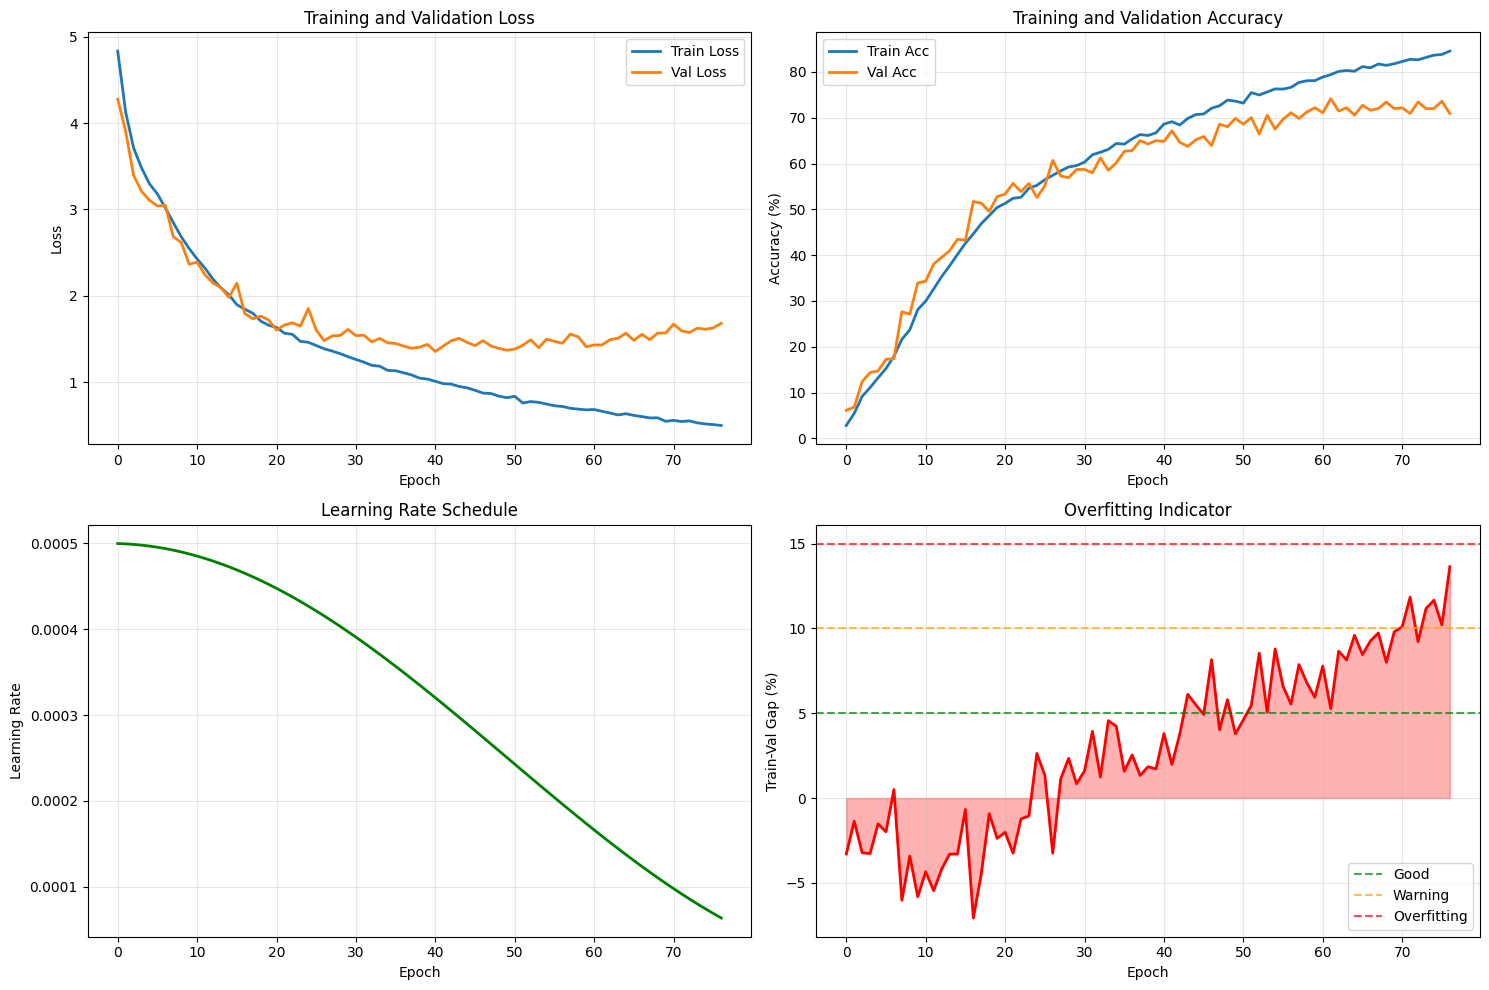


🎉 PIPELINE COMPLETE!
Best Validation Accuracy: 74.15%
Final Test Accuracy: 69.30%
Total epochs trained: 77
Best model saved to: ./vision_mamba_asl_best.pth
Checkpoint saved to: ./vision_mamba_checkpoint.pth


In [21]:
"""
COMPLETE VISION MAMBA FOR ASL RECOGNITION
ENHANCED: 100 epochs + Early stopping + Checkpoints
"""

import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
import os
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# ============================================================================
# CONFIGURATION - INCREASED EPOCHS
# ============================================================================

class Config:
    # Your data parameters
    NUM_FRAMES = 157
    FEATURE_DIM = 438
    NUM_CLASSES = 146
    
    # Training parameters - INCREASED
    BATCH_SIZE = 4  # Small for CPU, increase to 16-32 for GPU
    EPOCHS = 100  # INCREASED from 20 to 100
    
    # Early stopping
    EARLY_STOPPING_PATIENCE = 15  # Stop if no improvement for 15 epochs
    EARLY_STOPPING_MIN_DELTA = 0.5  # Minimum change to qualify as improvement
    
    # Vision Mamba parameters
    D_MODEL = 64  # Increased from 32 for better learning
    STATE_DIM = 16  # Increased from 8
    NUM_LAYERS = 4  # Increased from 2
    DROPOUT = 0.3  # Slightly increased for regularization
    
    # Training
    LEARNING_RATE = 5e-4
    MIN_LR = 1e-6
    WEIGHT_DECAY = 1e-4
    WARMUP_EPOCHS = 10  # Warmup for stable training
    
    # Paths
    SAVE_PATH = "./vision_mamba_asl_best.pth"
    CHECKPOINT_PATH = "./vision_mamba_checkpoint.pth"
    
    # Device
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

config = Config()
print(f"📊 Using device: {config.DEVICE}")
print(f"📊 Training for {config.EPOCHS} epochs with early stopping")
print(f"📊 D_MODEL={config.D_MODEL}, STATE_DIM={config.STATE_DIM}, LAYERS={config.NUM_LAYERS}")

# ============================================================================
# SSM - State Space Model
# ============================================================================

class SimplifiedSSM(nn.Module):
    """State Space Model with correct matrix dimensions"""
    def __init__(self, d_model, state_dim):
        super().__init__()
        self.d_model = d_model
        self.state_dim = state_dim
        
        # SSM parameters
        self.A = nn.Parameter(torch.randn(state_dim, state_dim) * 0.01)
        self.B = nn.Parameter(torch.randn(d_model, state_dim) * 0.01)
        self.C = nn.Parameter(torch.randn(state_dim, d_model) * 0.01)
        
        # Projections
        self.in_proj = nn.Linear(d_model, d_model * 2)
        self.out_proj = nn.Linear(d_model, d_model)
        
    def forward(self, x):
        batch, seq_len, d_model = x.shape
        
        # Input projection for gating
        x_and_gate = self.in_proj(x)
        u, gate = x_and_gate.chunk(2, dim=-1)
        
        # Initialize state
        h = torch.zeros(batch, self.state_dim, device=x.device)
        outputs = []
        
        # SSM scan
        for t in range(seq_len):
            u_t = u[:, t, :]
            h = torch.einsum('sd,bs->bd', self.A, h) + torch.einsum('ds,bd->bs', self.B, u_t)
            y = torch.einsum('ds,bd->bs', self.C, h)
            outputs.append(y)
        
        y = torch.stack(outputs, dim=1)
        y = y * torch.sigmoid(gate)
        y = self.out_proj(y)
        
        return y

class VisionMambaBlock(nn.Module):
    """Vision Mamba block"""
    def __init__(self, d_model, state_dim, dropout):
        super().__init__()
        
        self.ssm = SimplifiedSSM(d_model, state_dim)
        self.norm1 = nn.LayerNorm(d_model)
        
        self.mlp = nn.Sequential(
            nn.Linear(d_model, d_model * 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(d_model * 2, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # SSM path with residual
        residual = x
        x = self.norm1(x)
        x = self.ssm(x)
        x = self.dropout(x)
        x = residual + x
        
        # MLP path with residual
        residual = x
        x = self.norm2(x)
        x = self.mlp(x)
        x = self.dropout(x)
        x = residual + x
        
        return x

# ============================================================================
# POSITIONAL ENCODING
# ============================================================================

class PositionalEncoding(nn.Module):
    """Sinusoidal positional encoding"""
    def __init__(self, d_model, max_len):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * 
                            (-math.log(10000.0) / d_model))
        
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))
    
    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

# ============================================================================
# MAIN VISION MAMBA MODEL
# ============================================================================

class VisionMambaASL(nn.Module):
    """Vision Mamba for ASL recognition"""
    
    def __init__(self, config):
        super().__init__()
        
        # Input projection
        self.input_proj = nn.Sequential(
            nn.Linear(config.FEATURE_DIM, config.D_MODEL),
            nn.LayerNorm(config.D_MODEL),
            nn.Dropout(config.DROPOUT)
        )
        
        # Positional encoding
        self.pos_encoder = PositionalEncoding(config.D_MODEL, config.NUM_FRAMES)
        
        # Vision Mamba layers
        self.vmamba_layers = nn.ModuleList([
            VisionMambaBlock(
                config.D_MODEL,
                config.STATE_DIM,
                config.DROPOUT
            )
            for _ in range(config.NUM_LAYERS)
        ])
        
        # Temporal pooling
        self.temporal_pool = nn.AdaptiveAvgPool1d(1)
        
        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(config.D_MODEL, 128),
            nn.GELU(),
            nn.Dropout(config.DROPOUT),
            nn.Linear(128, config.NUM_CLASSES)
        )
        
        # Initialize weights
        self.apply(self._init_weights)
    
    def _init_weights(self, module):
        if isinstance(module, nn.Linear):
            torch.nn.init.normal_(module.weight, mean=0.0, std=0.02)
            if module.bias is not None:
                torch.nn.init.zeros_(module.bias)
    
    def forward(self, x):
        # x shape: (batch, frames, 438)
        
        # Project input
        x = self.input_proj(x)
        
        # Add positional encoding
        x = self.pos_encoder(x)
        
        # Apply Vision Mamba layers
        for layer in self.vmamba_layers:
            x = layer(x)
        
        # Temporal pooling
        x = x.transpose(1, 2)
        x = self.temporal_pool(x).squeeze(-1)
        
        # Classify
        x = self.classifier(x)
        
        return x

# ============================================================================
# DATASET
# ============================================================================

class ASLDataset(Dataset):
    """Directly uses your numpy arrays"""
    
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.astype(np.float32))
        self.y = torch.LongTensor(y.astype(np.int64))
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# ============================================================================
# ENHANCED TRAINER WITH EARLY STOPPING
# ============================================================================

class EnhancedTrainer:
    def __init__(self, model, config):
        self.model = model
        self.config = config
        self.device = config.DEVICE
        self.model = self.model.to(self.device)
        
        # Optimizer
        self.optimizer = torch.optim.AdamW(
            model.parameters(),
            lr=config.LEARNING_RATE,
            weight_decay=config.WEIGHT_DECAY
        )
        
        # Cosine annealing scheduler
        self.scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(
            self.optimizer, T_max=config.EPOCHS, eta_min=config.MIN_LR
        )
        
        self.criterion = nn.CrossEntropyLoss()
        self.history = {'train_loss': [], 'train_acc': [], 
                       'val_loss': [], 'val_acc': [], 'lr': []}
        
        # Early stopping variables
        self.best_val_acc = 0
        self.best_val_loss = float('inf')
        self.patience_counter = 0
        self.best_epoch = 0
        
        # Load checkpoint if exists
        self.start_epoch = 0
        self._load_checkpoint()
    
    def _load_checkpoint(self):
        """Load checkpoint if exists"""
        if os.path.exists(self.config.CHECKPOINT_PATH):
            print(f"📥 Loading checkpoint from {self.config.CHECKPOINT_PATH}")
            checkpoint = torch.load(self.config.CHECKPOINT_PATH, map_location=self.device)
            self.model.load_state_dict(checkpoint['model_state_dict'])
            self.optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
            self.start_epoch = checkpoint['epoch']
            self.best_val_acc = checkpoint.get('best_val_acc', 0)
            self.best_val_loss = checkpoint.get('best_val_loss', float('inf'))
            self.history = checkpoint.get('history', self.history)
            print(f"   Resuming from epoch {self.start_epoch}")
            print(f"   Best val acc so far: {self.best_val_acc:.2f}%")
    
    def _save_checkpoint(self, epoch, is_best=False):
        """Save checkpoint"""
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': self.model.state_dict(),
            'optimizer_state_dict': self.optimizer.state_dict(),
            'best_val_acc': self.best_val_acc,
            'best_val_loss': self.best_val_loss,
            'history': self.history
        }
        
        # Save regular checkpoint
        torch.save(checkpoint, self.config.CHECKPOINT_PATH)
        
        # Save best model separately
        if is_best:
            torch.save(self.model.state_dict(), self.config.SAVE_PATH)
            print(f"   💾 Saved best model (val_acc: {self.best_val_acc:.2f}%)")
    
    def train_epoch(self, train_loader, epoch):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0
        
        pbar = tqdm(train_loader, desc=f'Epoch {epoch+1}/{self.config.EPOCHS} [Train]')
        for batch_x, batch_y in pbar:
            batch_x, batch_y = batch_x.to(self.device), batch_y.to(self.device)
            
            self.optimizer.zero_grad()
            outputs = self.model(batch_x)
            loss = self.criterion(outputs, batch_y)
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            
            self.optimizer.step()
            
            total_loss += loss.item()
            _, predicted = outputs.max(1)
            total += batch_y.size(0)
            correct += predicted.eq(batch_y).sum().item()
            
            # Update progress bar
            current_lr = self.optimizer.param_groups[0]['lr']
            pbar.set_postfix({
                'loss': f'{total_loss/(pbar.n+1):.4f}',
                'acc': f'{100.*correct/total:.1f}%',
                'lr': f'{current_lr:.2e}'
            })
        
        return total_loss/len(train_loader), 100.*correct/total
    
    def validate(self, val_loader):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        
        with torch.no_grad():
            for batch_x, batch_y in tqdm(val_loader, desc='Validation'):
                batch_x, batch_y = batch_x.to(self.device), batch_y.to(self.device)
                outputs = self.model(batch_x)
                loss = self.criterion(outputs, batch_y)
                
                total_loss += loss.item()
                _, predicted = outputs.max(1)
                total += batch_y.size(0)
                correct += predicted.eq(batch_y).sum().item()
        
        return total_loss/len(val_loader), 100.*correct/total
    
    def fit(self, train_loader, val_loader):
        for epoch in range(self.start_epoch, self.config.EPOCHS):
            print(f"\n{'='*60}")
            print(f"📌 Epoch {epoch+1}/{self.config.EPOCHS}")
            print(f"{'='*60}")
            
            # Train
            train_loss, train_acc = self.train_epoch(train_loader, epoch)
            
            # Validate
            val_loss, val_acc = self.validate(val_loader)
            
            # Update scheduler
            self.scheduler.step()
            current_lr = self.optimizer.param_groups[0]['lr']
            
            # Save history
            self.history['train_loss'].append(train_loss)
            self.history['train_acc'].append(train_acc)
            self.history['val_loss'].append(val_loss)
            self.history['val_acc'].append(val_acc)
            self.history['lr'].append(current_lr)
            
            # Print results
            print(f"\n📊 Results:")
            print(f"   Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
            print(f"   Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
            print(f"   LR: {current_lr:.2e}")
            
            # Check for improvement
            improved = False
            if val_acc > self.best_val_acc + self.config.EARLY_STOPPING_MIN_DELTA:
                self.best_val_acc = val_acc
                self.best_val_loss = val_loss
                self.best_epoch = epoch
                self.patience_counter = 0
                improved = True
                print(f"   🏆 New best validation accuracy: {val_acc:.2f}%")
            else:
                self.patience_counter += 1
                print(f"   ⏳ Patience: {self.patience_counter}/{self.config.EARLY_STOPPING_PATIENCE}")
            
            # Save checkpoint
            self._save_checkpoint(epoch, improved)
            
            # Early stopping check
            if self.patience_counter >= self.config.EARLY_STOPPING_PATIENCE:
                print(f"\n⏹️ Early stopping triggered after {epoch+1} epochs")
                print(f"   Best validation accuracy: {self.best_val_acc:.2f}% at epoch {self.best_epoch+1}")
                break
        
        print(f"\n{'='*60}")
        print(f"🏁 TRAINING COMPLETE")
        print(f"{'='*60}")
        print(f"Best validation accuracy: {self.best_val_acc:.2f}% at epoch {self.best_epoch+1}")
        print(f"Total epochs trained: {len(self.history['train_acc'])}")
        
        return self.history

# ============================================================================
# PLOTTING FUNCTION
# ============================================================================

def plot_history(history):
    """Plot training history"""
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Loss
    axes[0,0].plot(history['train_loss'], label='Train Loss', linewidth=2)
    axes[0,0].plot(history['val_loss'], label='Val Loss', linewidth=2)
    axes[0,0].set_xlabel('Epoch')
    axes[0,0].set_ylabel('Loss')
    axes[0,0].set_title('Training and Validation Loss')
    axes[0,0].legend()
    axes[0,0].grid(True, alpha=0.3)
    
    # Accuracy
    axes[0,1].plot(history['train_acc'], label='Train Acc', linewidth=2)
    axes[0,1].plot(history['val_acc'], label='Val Acc', linewidth=2)
    axes[0,1].set_xlabel('Epoch')
    axes[0,1].set_ylabel('Accuracy (%)')
    axes[0,1].set_title('Training and Validation Accuracy')
    axes[0,1].legend()
    axes[0,1].grid(True, alpha=0.3)
    
    # Learning Rate
    axes[1,0].plot(history['lr'], color='green', linewidth=2)
    axes[1,0].set_xlabel('Epoch')
    axes[1,0].set_ylabel('Learning Rate')
    axes[1,0].set_title('Learning Rate Schedule')
    axes[1,0].grid(True, alpha=0.3)
    
    # Gap between train and val
    gap = np.array(history['train_acc']) - np.array(history['val_acc'])
    axes[1,1].plot(gap, color='red', linewidth=2)
    axes[1,1].fill_between(range(len(gap)), 0, gap, alpha=0.3, color='red')
    axes[1,1].set_xlabel('Epoch')
    axes[1,1].set_ylabel('Train-Val Gap (%)')
    axes[1,1].set_title('Overfitting Indicator')
    axes[1,1].axhline(y=5, color='green', linestyle='--', alpha=0.7, label='Good')
    axes[1,1].axhline(y=10, color='orange', linestyle='--', alpha=0.7, label='Warning')
    axes[1,1].axhline(y=15, color='red', linestyle='--', alpha=0.7, label='Overfitting')
    axes[1,1].legend()
    axes[1,1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('training_history.png', dpi=150)
    plt.show()

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    print("="*60)
    print("🎯 VISION MAMBA FOR ASL RECOGNITION")
    print(f"   Training for up to {config.EPOCHS} epochs with early stopping")
    print("="*60)
    
    # Check your data
    required_vars = {
        'X_tr_data': globals().get('X_tr_data'),
        'y_tr': globals().get('y_tr'),
        'X_val_data': globals().get('X_val_data'),
        'y_val': globals().get('y_val'),
        'X_te_data': globals().get('X_te_data'),
        'y_te': globals().get('y_te')
    }
    
    missing = [name for name, value in required_vars.items() if value is None]
    if missing:
        print(f"❌ Missing required variables: {missing}")
        print("   Please load your data first.")
        return None, None, None
    
    print(f"Training samples: {len(X_tr_data)}")
    print(f"Validation samples: {len(X_val_data)}")
    print(f"Test samples: {len(X_te_data)}")
    print(f"Input shape: {X_tr_data.shape[1:]}")
    print("="*60)
    
    # Create datasets
    print("\n📊 Creating datasets...")
    train_dataset = ASLDataset(X_tr_data, y_tr)
    val_dataset = ASLDataset(X_val_data, y_val)
    test_dataset = ASLDataset(X_te_data, y_te)
    
    # Create data loaders
    train_loader = DataLoader(
        train_dataset, 
        batch_size=config.BATCH_SIZE, 
        shuffle=True,
        num_workers=0
    )
    val_loader = DataLoader(
        val_dataset, 
        batch_size=config.BATCH_SIZE, 
        shuffle=False,
        num_workers=0
    )
    test_loader = DataLoader(
        test_dataset, 
        batch_size=config.BATCH_SIZE, 
        shuffle=False,
        num_workers=0
    )
    
    # Create model
    print("\n🛠️ Creating Vision Mamba model...")
    model = VisionMambaASL(config)
    
    # Count parameters
    total_params = sum(p.numel() for p in model.parameters())
    print(f"📊 Total parameters: {total_params:,}")
    
    # Train with enhanced trainer
    print(f"\n🚀 Starting training (max {config.EPOCHS} epochs, patience {config.EARLY_STOPPING_PATIENCE})...")
    trainer = EnhancedTrainer(model, config)
    history = trainer.fit(train_loader, val_loader)
    
    # Load best model
    if os.path.exists(config.SAVE_PATH):
        model.load_state_dict(torch.load(config.SAVE_PATH, map_location=config.DEVICE))
        print(f"\n✅ Loaded best model from {config.SAVE_PATH}")
    
    # Final evaluation
    print("\n📊 Evaluating on test set...")
    model.eval()
    test_correct = 0
    test_total = 0
    
    with torch.no_grad():
        for batch_x, batch_y in tqdm(test_loader, desc='Testing'):
            batch_x, batch_y = batch_x.to(trainer.device), batch_y.to(trainer.device)
            outputs = model(batch_x)
            _, predicted = outputs.max(1)
            test_total += batch_y.size(0)
            test_correct += predicted.eq(batch_y).sum().item()
    
    test_acc = 100. * test_correct / test_total
    print(f"\n{'='*60}")
    print(f"🎯 FINAL TEST ACCURACY: {test_acc:.2f}%")
    print(f"{'='*60}")
    
    # Plot training history
    plot_history(history)
    
    return model, history, test_acc

# ============================================================================
# RUN
# ============================================================================

if __name__ == "__main__":
    # Run training
    model, history, test_acc = main()
    
    if model is not None:
        print(f"\n{'='*60}")
        print(f"🎉 PIPELINE COMPLETE!")
        print(f"{'='*60}")
        print(f"Best Validation Accuracy: {max(history['val_acc']):.2f}%")
        print(f"Final Test Accuracy: {test_acc:.2f}%")
        print(f"Total epochs trained: {len(history['train_acc'])}")
        print(f"Best model saved to: {config.SAVE_PATH}")
        print(f"Checkpoint saved to: {config.CHECKPOINT_PATH}")